# Preamble

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
import statistics as st
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

# Data

In [4]:
f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/gas_metal_BH.pkl', 'rb')
gas_metal_BH_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal.pkl', 'rb')
gas_metal_data = pickle.load(f)
f.close()

f = open('./Data/stellar_h_frac.pkl', 'rb')
stellar_h_data = pickle.load(f)
f.close()

f = open('./Data/gas_h_frac.pkl', 'rb')
gas_h_data = pickle.load(f)
f.close()

f = open('./Data/Fe_Ox_data.pkl', 'rb')
saved_Fe_Ox_data = pickle.load(f)
f.close()

f = open('./Data/SFR_data.pkl', 'rb')
saved_SFR_data = pickle.load(f)
f.close()

f = open('./Data/O_gas_cut.pkl', 'rb')
saved_gas_data = pickle.load(f)
f.close()

f = open('./Data/Fe_cut_stellar.pkl', 'rb')
saved_stellar_data = pickle.load(f)
f.close()

In [5]:
all_halo_numbers = np.array(gas_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.in1d(all_halo_numbers, halo_with_BH)
halo_no_BH_ind = np.in1d(all_halo_numbers, halo_with_BH, invert = True)

# Functions

In [6]:
def small_get_halo_ind(arr1, num2, i):
    x = []
    if arr1[i] < num2:
        x = np.append(x, i)
    return x

In [7]:
def big_get_halo_ind(arr1, num, i):
    x = []
    if arr1[i] > num:
        x = np.append(x, i)
    return x

In [8]:
def between_get_halo_ind(arr1, num1, num2, i):
    x = []
    if num1 < arr1[i] < num2:
        x = np.append(x, i)
    return x

# Main

Maybe I want to get the BH SFR for the last timestep and compare them with that of the haloes without BHs. This is not for the metallicity profiles, this is for Fe/H and O/H

In [9]:
stellar_cut_high = saved_stellar_data['stellar_high']
stellar_cut_low = saved_stellar_data['stellar_low']
stellar_BH_cut_low = saved_stellar_data['BH_stellar_low']

gas_cut_high = saved_gas_data['gas_low']
gas_cut_low = saved_gas_data['gas_high']
gas_BH_cut_low = saved_gas_data['BH_gas_low']

In [10]:
stellar_mass_high = saved_stellar_data['mass_high']
stellar_mass_low = saved_stellar_data['mass_low']
BH_stellar_mass_low = saved_stellar_data['mass_BH_low']

gas_mass_high = saved_gas_data['gas_stellar_mass_high']
gas_mass_low = saved_gas_data['gas_stellar_mass_low']
BH_gas_stellar_mass_low = saved_gas_data['BH_gas_stellar_mass_low']

In [11]:
loop1 = np.arange(len(stellar_mass_low))
loop2 = np.arange(len(BH_stellar_mass_low))

stellar_mass_low_ind = []
BH_stellar_mass_low_ind = []

for i in loop1:
    stellar_mass_low_ind = np.append(stellar_mass_low_ind, big_get_halo_ind(stellar_mass_low, 1e8, i))
    
for i in loop2:
    BH_stellar_mass_low_ind = np.append(BH_stellar_mass_low_ind, big_get_halo_ind(BH_stellar_mass_low, 1e8, i))

In [12]:
stellar_mass_low_ind = stellar_mass_low_ind.astype(int)
BH_stellar_mass_low_ind = BH_stellar_mass_low_ind.astype(int)

In [13]:
stellar_mass_low_cut = stellar_mass_low[stellar_mass_low_ind]
BH_stellar_mass_low_cut = BH_stellar_mass_low[BH_stellar_mass_low_ind]

stellar_cut_low_cut = stellar_cut_low[stellar_mass_low_ind]
BH_stellar_cut_low_cut = stellar_BH_cut_low[BH_stellar_mass_low_ind]

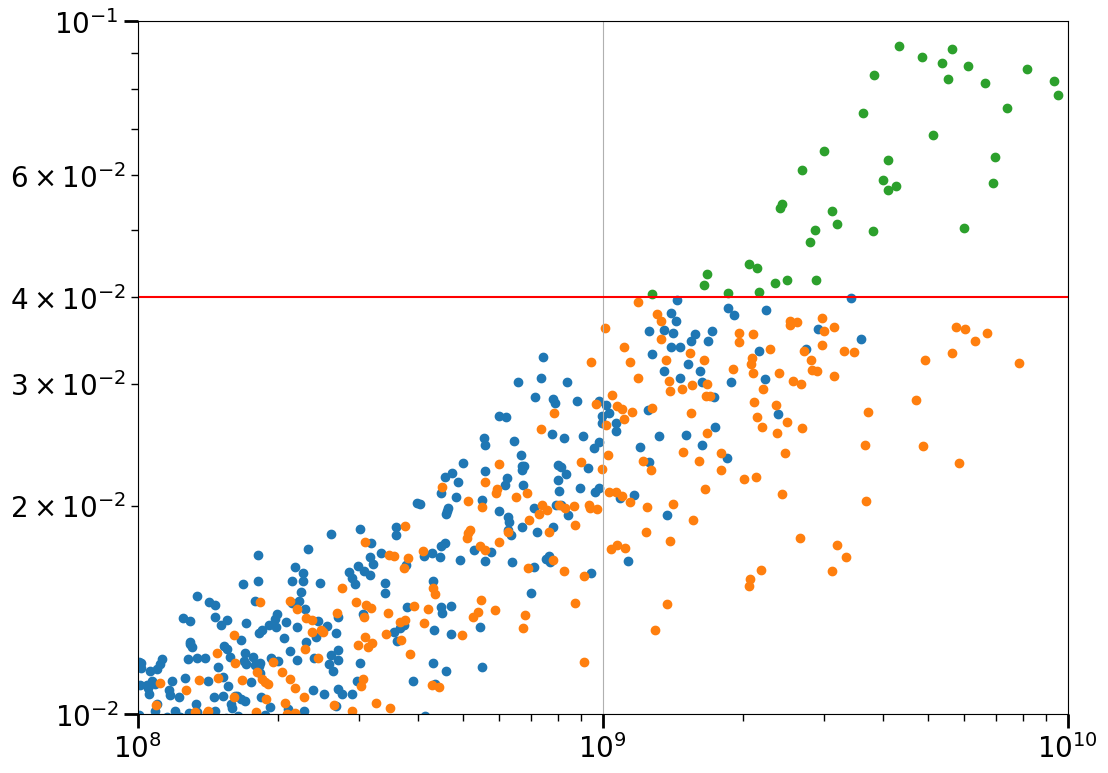

In [14]:
plt.scatter(stellar_mass_low_cut, stellar_cut_low_cut/solar_metal)
plt.scatter(BH_stellar_mass_low_cut, BH_stellar_cut_low_cut/solar_metal)
plt.scatter(stellar_mass_high, stellar_cut_high/solar_metal)

plt.axhline(y = 0.04, color = 'red')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1e8, 1e10])
plt.ylim([1e-2, 1e-1])


plt.grid()
plt.show()

In [15]:
stellar_cut_low_cut = stellar_cut_low_cut.astype(int)
BH_stellar_cut_low_cut = BH_stellar_cut_low_cut.astype(int)

In [16]:
data_raw = step.calculate_all("host_halo.at(0.9 * radius(200),SFR_encl_25Myr)", "host_halo.at(0.9 * radius(200), SFR_encl_250Myr)",'halo_number()')
SFR_master_array = []
for count, item in enumerate(data_raw[0]):
    if item != 0:
        SFR_master_array.append(item)
    elif data_raw[1][count] != 0:
        SFR_master_array.append(data_raw[1][count])
    else:
        SFR_master_array.append((6*10**4)/(250*10**6))

In [17]:
SFR_master = saved_SFR_data['SFR']
SFR_fe = saved_SFR_data['SFR_Mstar_fe']

KeyError: 'SFR'

In [ ]:
SFR_master_array[-1]

In [ ]:
plt.hist(np.log10(SFR_master), bins = 20, density=True, histtype='step', lw=3, label = 'a')
plt.hist(np.log10(SFR_master_array), bins = 20, density=True, histtype='step', lw=3)

plt.ylabel('Probability Distribution')
plt.xlabel('SFR $[M_{\odot}/Yr]$')
plt.title('SFR vs Probability Distribution at last time step')

plt.yscale('log')
#plt.xscale('log')

plt.legend()
plt.show()

In [ ]:
plt.hist(SFR_fe, bins = 20, density=True, histtype='step', lw=3)
#plt.hist(SFR_low, bins = 40, density=True, histtype='step', lw=3)

plt.ylabel('Probability Distribution')
plt.xlabel('SFR $[M_{\odot}/Yr]$')
plt.title('SFR vs Probability Distribution at last time step')

plt.yscale('log')
#plt.xscale('log')

plt.show()

In [ ]:
plt.hist(SFR_master_array, bins = 20, density=True, histtype='step', lw=3)
#plt.hist(SFR_low, bins = 40, density=True, histtype='step', lw=3)

plt.ylabel('Probability Distribution')
plt.xlabel('SFR (Myr)')
plt.title('SFR vs Probability Distribution at last time step')

plt.yscale('log')
#plt.xscale('log')

plt.show()

In [ ]:
def assembly_single(halo, threshold, sim=sim, tstep=33):
    #A function which takes in a single halo and finds time at which halo reached that percentage of mass by interpolating mass vs time
    #halo: halo as per .halos[halo]
    #threshold: value between 0.1<threshold<=1 so we can find time at which mass = threshold * final mass
    #tstep: Timestep considered as per .timesteps[tstep]
    #sim: By default Romulus25. The simulation in question
    
    my_halo = sim.timesteps[tstep].halos[halo]
    M_history, t_history = my_halo.calculate_for_progenitors("Mstar", "t()")
    M_history, t_history = np.flip(M_history), np.flip(t_history)
    t_interp = np.linspace(int(t_history[0]*100)/100, int(t_history[-1]*100)/100, int((t_history[-1]-t_history[0]) * 100)+1)+0.01
    
    M_interp = np.array(np.interp(t_interp, t_history, M_history))
    
    
    return t_interp[np.where(M_interp/M_interp[-1] > threshold)[0][0]]

In [ ]:
metal_ass = []

metal_ass = [assembly_single(halo_num, threshold = 0.5, sim = sim, tstep = -1) for halo_num in high_no_BH]

In [ ]:
metal_ass[0]

In [ ]:
mstar, t = sim.timesteps[-1].halos[high_no_BH[0]].calculate_for_progenitors('Mstar', 't()')

In [ ]:
mstar

In [ ]:
plt.plot(t, mstar/mstar[0])
plt.show()